## Stack VS Manual filling
Which is the fastest way to fill a NumPy matrix according to some rule?
- Filling it manually after generating it with `np.zeros`
- Stacking pre-made matrices with some variant of `np.stack`

In [1]:
import numpy as np
from plot_machinery.plot import data, kernel, plot, repeat_count, clear_kernels

In [2]:
def generator(index, cols):
    return index * np.arange(index * 100 - cols, index * 100)[::-1]


@kernel()
def manual(rows, cols, chunk_size):
    x = np.zeros((rows, cols), dtype=float)
    for i in range(1, rows // chunk_size + 1):
        x[(i - 1) * chunk_size : i * chunk_size] = generator(i, cols)
    return x


@kernel()
def vstack(rows, cols, chunk_size):
    return np.vstack(
        tuple(
            np.repeat(generator(i, cols), repeats=100, axis=0)
            for i in range(1, rows // chunk_size + 1)
        )
    )

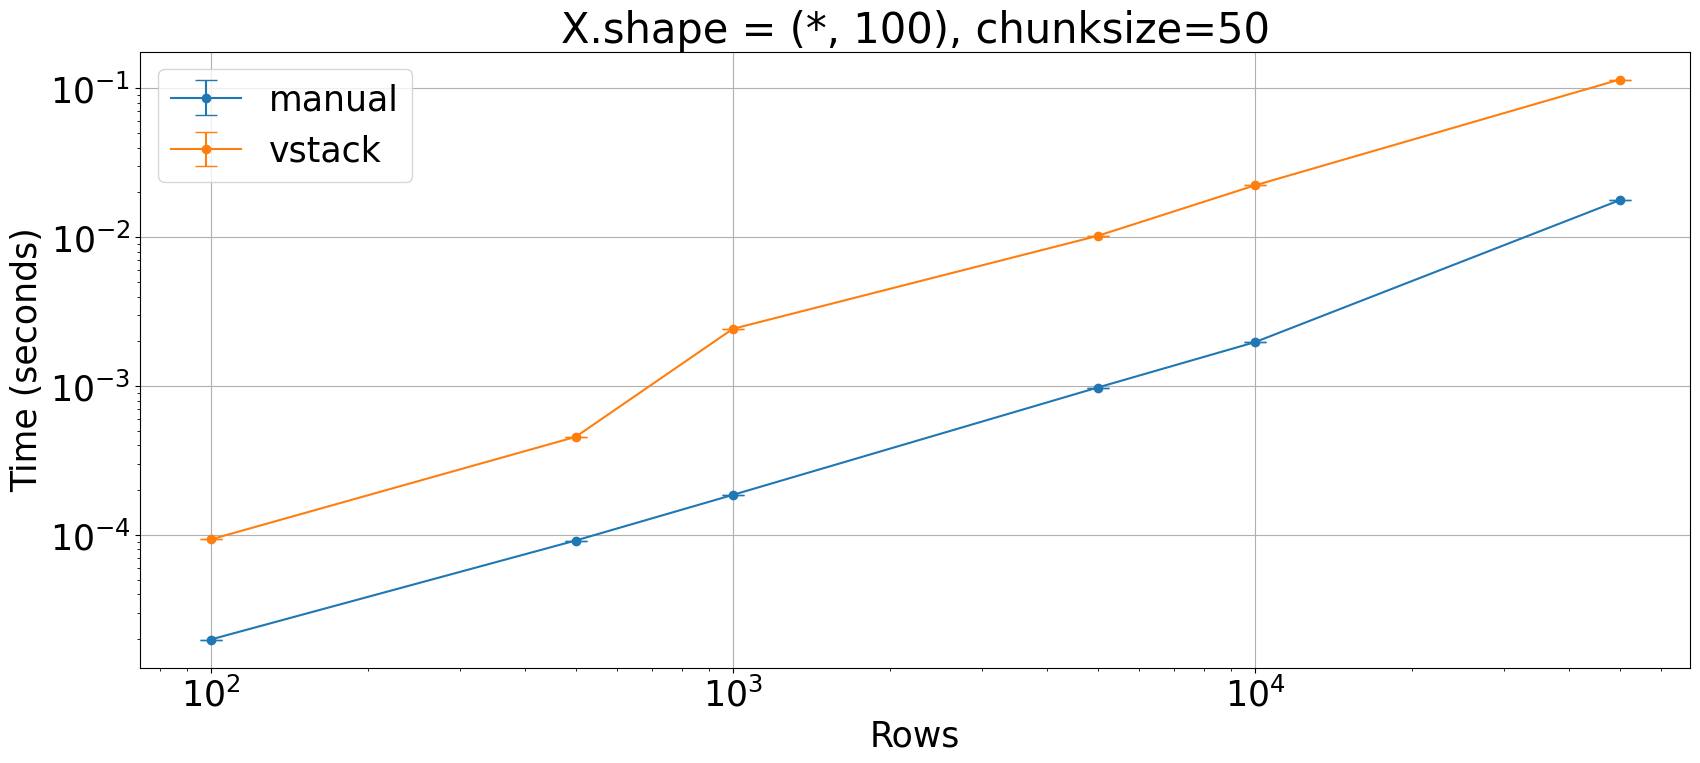

In [3]:
@data(steps=[100, 500, 1000, 5000, 10000, 50000])
def scale_rows(step):
    return step, 100, 50


plot(logx=True, logy=True, xlabel="Rows", title="X.shape = (*, 100), chunksize=50")

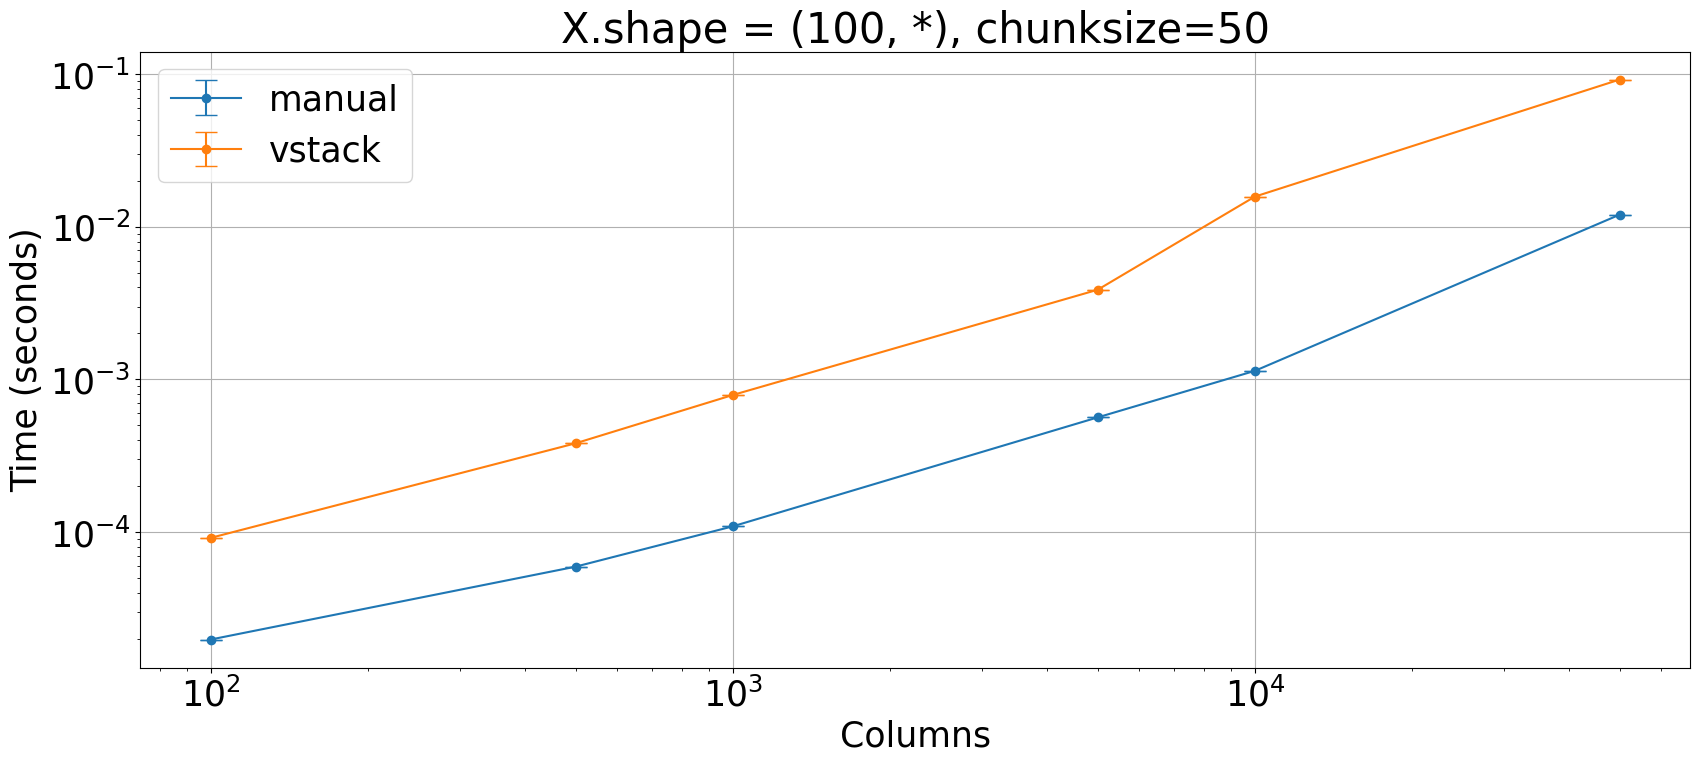

In [4]:
@data(steps=[100, 500, 1000, 5000, 10000, 50000])
def scale_columns(step):
    return 100, step, 50


plot(logx=True, logy=True, xlabel="Columns", title="X.shape = (100, *), chunksize=50")

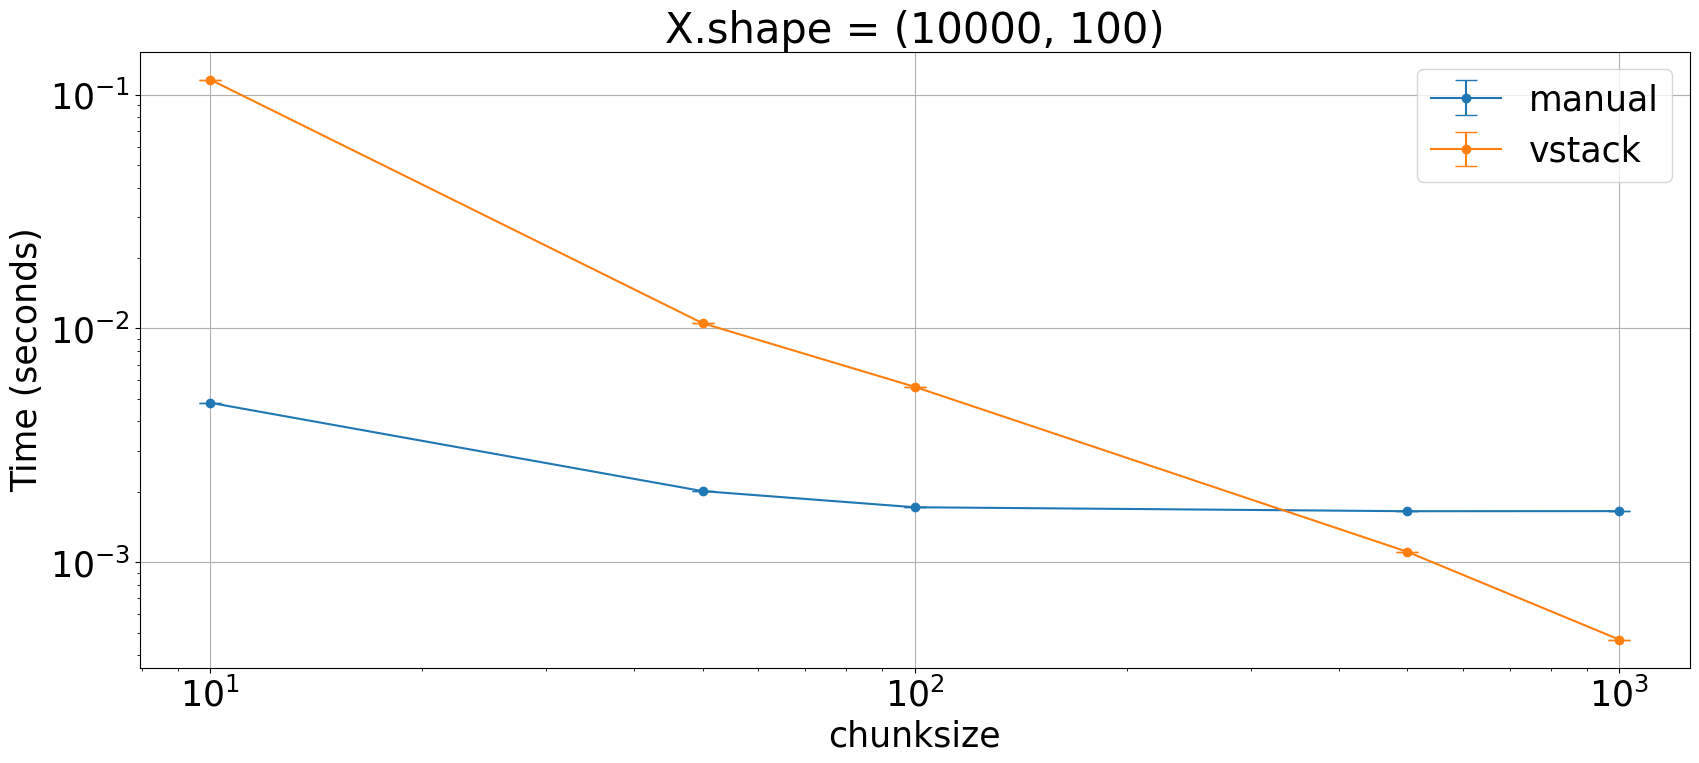

In [5]:
@data(steps=[10, 50, 100, 500, 1000])
def scale_chunksize(step):
    return 10000, 100, step


plot(logx=True, logy=True, xlabel="chunksize", title="X.shape = (10000, 100)")